# Nanda Sheptiana 2009106096
## POSTTEST 6 KB B2

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [204]:
dataset = pd.read_csv('IKEA.csv')

In [205]:
dts = dataset.copy()

In [206]:
dts

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


In [207]:
# menghapus beberapa kolom hanya menyisakan kolom item_id dan price
dts = dts.drop(['Unnamed: 0', 'name', 'category', 'old_price', 'sellable_online', 'link', 'other_colors', 'short_description', 'designer', 'depth', 'height', 'width'], axis = 1)

In [208]:
dts

,item_id,price
0,90420332,265.0
1,368814,995.0
2,9333523,2095.0
3,80155205,69.0
4,30180504,225.0
...,...,...
3689,99157902,750.0
3690,9158152,1572.0
3691,59157541,924.0
3692,89157573,2745.0


### Algoritma KMeans Clustering

In [209]:
# menentukan data yang akan dikluster
dts_x = dts.iloc[:, 0:3]

In [210]:
dts_x

,item_id,price
0,90420332,265.0
1,368814,995.0
2,9333523,2095.0
3,80155205,69.0
4,30180504,225.0
...,...,...
3689,99157902,750.0
3690,9158152,1572.0
3691,59157541,924.0
3692,89157573,2745.0


In [211]:
# mengubah data yang akan di kluster menjadi array
x_array = np.array(dts_x)
x_array

array([[9.0420332e+07, 2.6500000e+02],
       [3.6881400e+05, 9.9500000e+02],
       [9.3335230e+06, 2.0950000e+03],
       ...,
       [5.9157541e+07, 9.2400000e+02],
       [8.9157573e+07, 2.7450000e+03],
       [6.9157376e+07, 1.2310000e+03]])

In [212]:
# standarisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.90475729, 0.02734293],
       [0.00310718, 0.10352745],
       [0.09286725, 0.21832603],
       ...,
       [0.59173537, 0.09611772],
       [0.89211378, 0.28616155],
       [0.69185975, 0.12815696]])

In [234]:
kmeans = KMeans(n_clusters = 4)

In [235]:
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [236]:
kmeans.cluster_centers_

array([[0.16666784, 0.0794522 ],
       [0.82325025, 0.0975681 ],
       [0.50001511, 0.06571595],
       [0.47013536, 0.49132993]])

In [237]:
kmeans.labels_

array([1, 0, 0, ..., 2, 1, 1])

In [238]:
# membuat kolom baru dengan nama target
dts['target'] = kmeans.labels_

In [239]:
dts

,item_id,price,target
0,90420332,265.0,1
1,368814,995.0,0
2,9333523,2095.0,0
3,80155205,69.0,1
4,30180504,225.0,0
...,...,...,...
3689,99157902,750.0,1
3690,9158152,1572.0,0
3691,59157541,924.0,2
3692,89157573,2745.0,1


In [240]:
points = dts[['item_id', 'price']]

In [241]:
labels = kmeans.labels_

In [242]:
labels

array([1, 0, 0, ..., 2, 1, 1])

In [243]:
dataset_KMeans = pd.DataFrame({'cluster': labels, 'species':dts['target']})

In [244]:
crosstab = pd.crosstab(dataset_KMeans['cluster'], dataset_KMeans['species'])

In [245]:
crosstab

species,0,1,2,3
cluster,,,,
0,1273,0,0,0
1,0,1182,0,0
2,0,0,965,0
3,0,0,0,274


In [246]:
dts_x = points.iloc[:,0]
dts_y = points.iloc[:,1]

In [247]:
centroids = kmeans.cluster_centers_

In [248]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

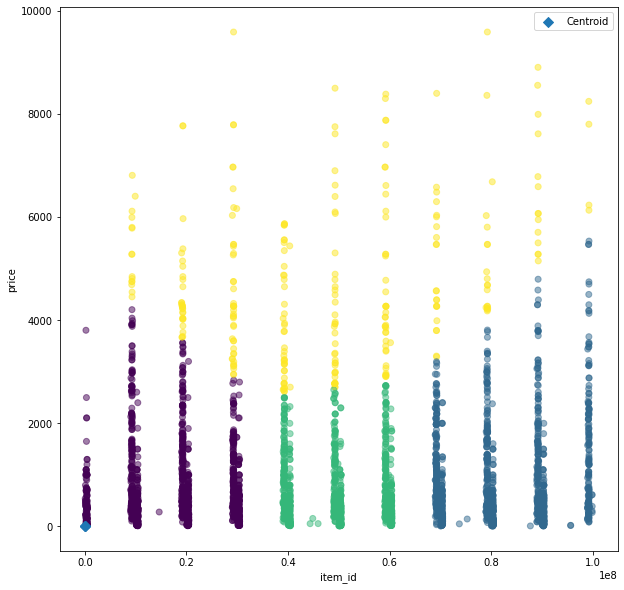

In [249]:
plt.figure(figsize=(10,10))
plt.scatter(dts_x, dts_y, alpha=0.5, c= labels)
plt.scatter(centroids_x, centroids_y, marker = 'D', s=50, label='Centroid')
plt.xlabel('item_id')
plt.ylabel('price')
plt.legend()
plt.show()

#### Menentukan Jumlah Cluster

In [229]:
kmeans_clustering = range(1,6)
inertias = []

for k in cluster_range:
    model =KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

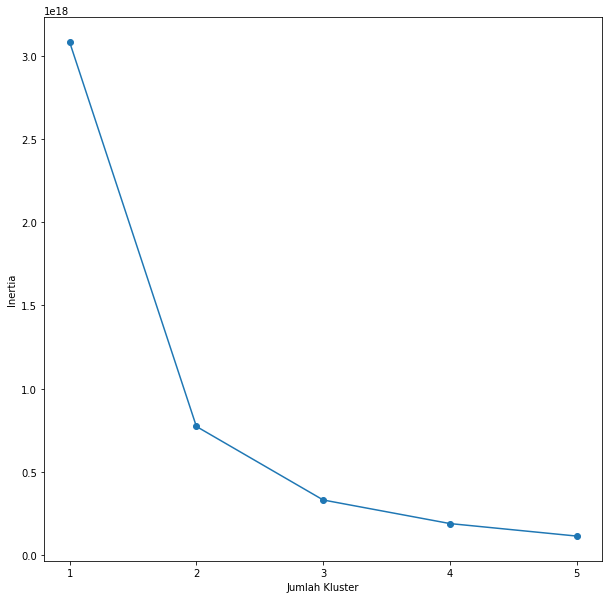

In [230]:
plt.figure(figsize=(10,10))
plt.plot(kmeans_clustering, inertias, '-o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.xticks(kmeans_clustering)
plt.show()

### Algoritma Hierarchical Clustering (Linkage)

In [231]:
points_linkage  = dts.iloc[:,[0,1]].values
points_complete = dts.iloc[:,[0,2]].values

In [232]:
linkage_hr = linkage(points_linkage, method='ward')
complete_hr = complete(points_complete)

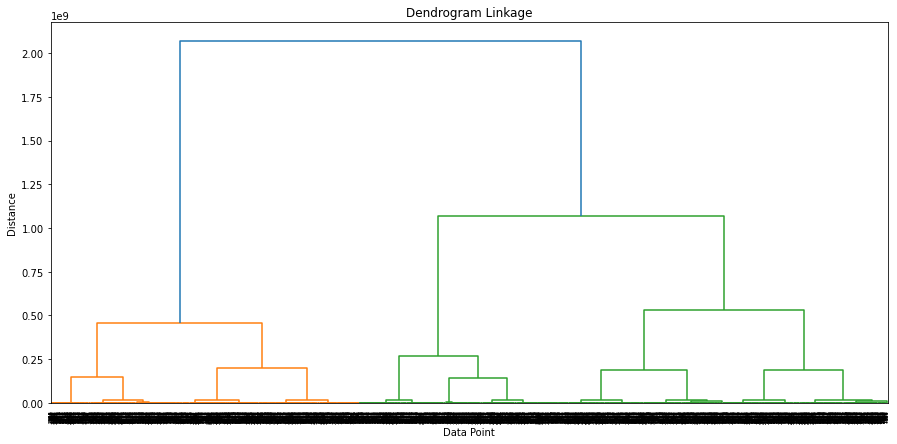

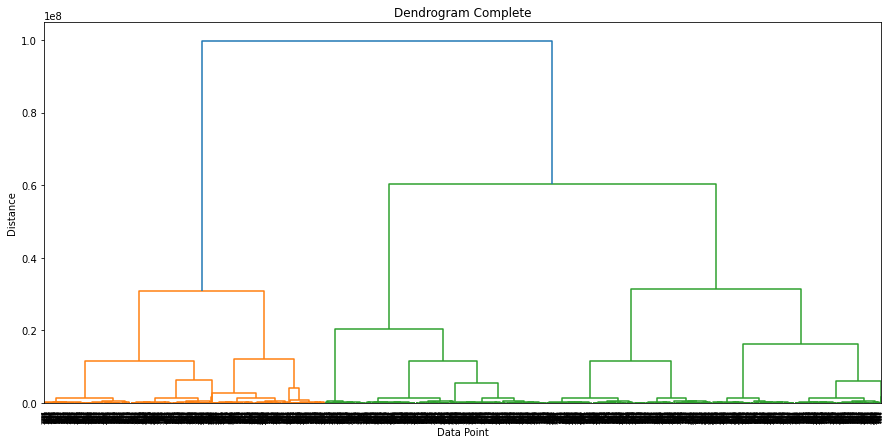

In [233]:
plt.figure(1, figsize=(15,7))
dendrogram(linkage_hr)
plt.title('Dendrogram Linkage')
plt.xlabel('Data Point')
plt.ylabel('Distance')

plt.figure(2, figsize=(15,7))
dendrogram(complete_hr)
plt.title('Dendrogram Complete')
plt.xlabel('Data Point')
plt.ylabel('Distance')

plt.show()